In [1]:
import warnings
warnings.filterwarnings("ignore")

## 训练模型（Training Models)
### 线性回归（Linear Regression）

<img src="./pic/linear-regression.png" height="300" width="400" align="left"></img>

#### 正规方程组

<a href="http://www.cnblogs.com/steed/p/7434864.html">正规方程</a>时间复杂度为O(n^3)当特征不多，且训练数据内存放得下的时候计算很快
<br/>
<img src="./pic/Normal Equation.png" height="100" width="200" align="left"></img>

In [2]:
import numpy as np

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

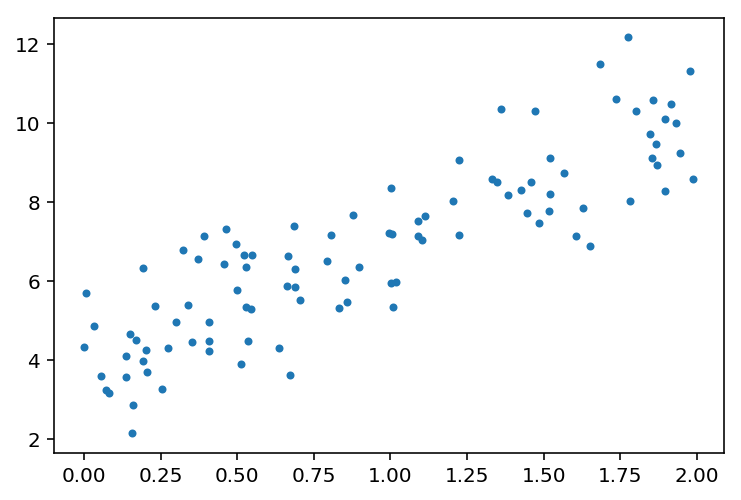

In [4]:
plt.plot(X,y,".")

In [5]:
X_b = np.c_[np.ones((100,1)),X]
#np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
#np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 3.91056271],
       [ 3.11105567]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.91056271],
       [ 10.13267405]])

[0, 2, 0, 15]

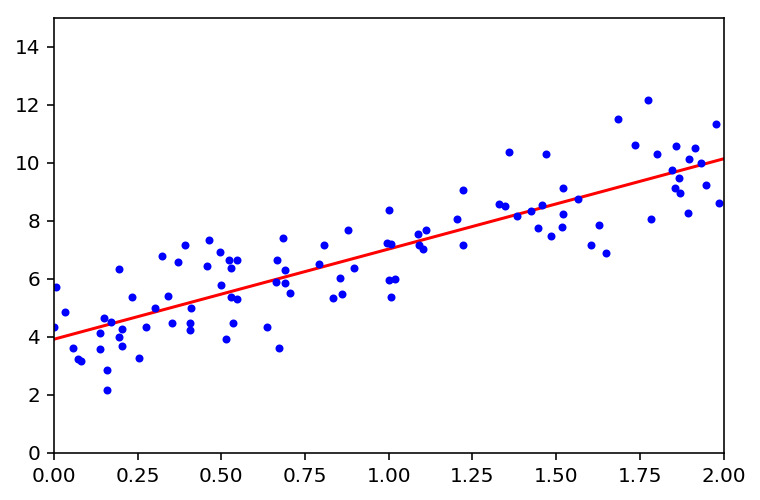

In [8]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [9]:
# sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
lin_reg.intercept_,lin_reg.coef_

(array([ 3.91056271]), array([[ 3.11105567]]))

In [11]:
lin_reg.predict(X_new)

array([[  3.91056271],
       [ 10.13267405]])

#### 梯度下降

<img src="./pic/gradient-descent.png" height="300" width="400" align="left"></img>

In [14]:
##学习率超参是梯度下降的一个重要参数，过大过小都会有影响，太小学习太慢，太大可能会跳过最小值

In [28]:
# 批量梯度下降
## 损失函数 lose
## 偏微分 d(lose)/d(wi)
## 梯度步骤 w(i+1) = w(i) + r * d(lose)/d(wi)
#eta = 0.0002 过小
eta = 0.1 
#eta = 0.5 过大
n_iterators = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterators):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [29]:
y_predict1 = X_new_b.dot(theta)
y_predict1

array([[ 2.1422395 ],
       [ 4.01266492]])

[0, 2, 0, 15]

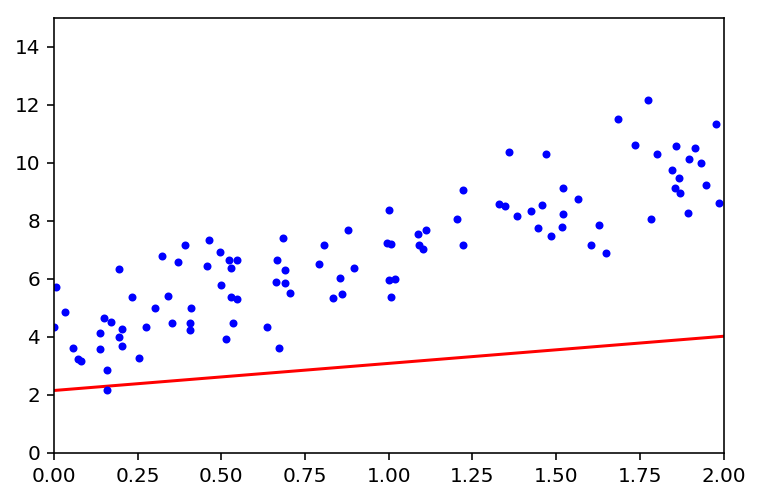

In [30]:
plt.plot(X_new,y_predict1,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

[0, 2, 0, 15]

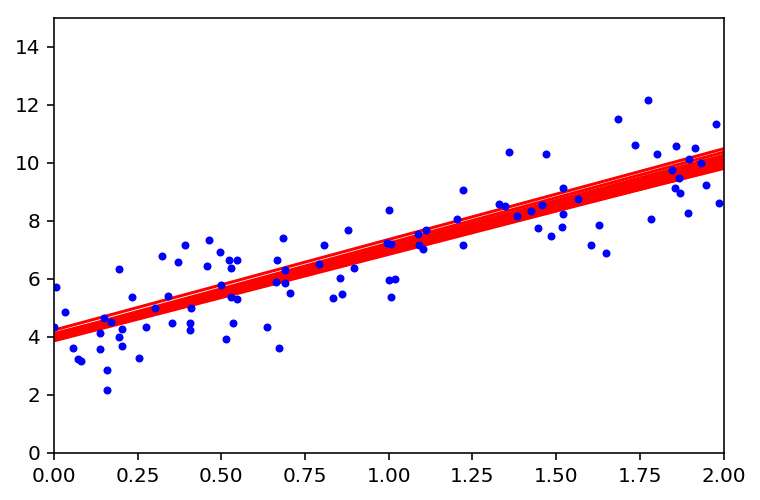

In [42]:
# 随机梯度下降
import time

n_epoch = 50 
t0,t1 = 5, 50 # learning schedule hyperparameters,在迭代的过程中修改学习率
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    if epoch > 0:
        y_predict2 = X_new_b.dot(theta)
        y_predict2
        plt.plot(X_new,y_predict2,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [45]:
# sklearn的SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
# np里的ravel()功能相当于np的flatten()
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([ 3.88109491]), array([ 3.05294862]))

In [46]:
# mini-批量地图下降

<img src="./pic/comparison-of-algorithms-for-linear-regression.png" height="300" width="400" align="left"></img>

#### 多项式回归

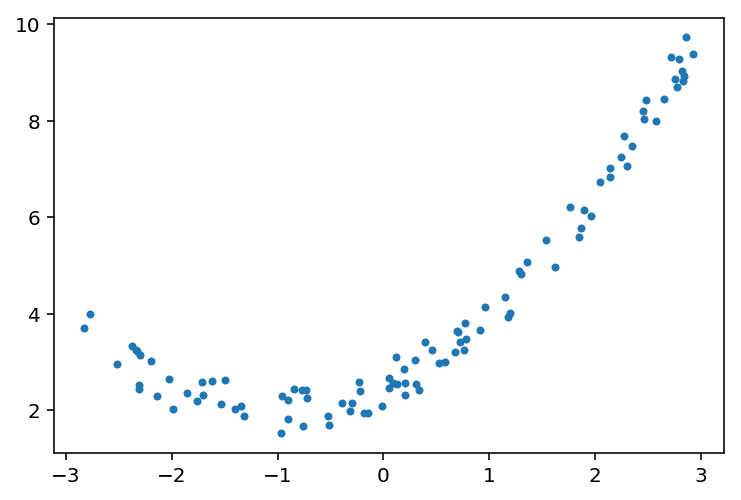

In [48]:
# 针对非线性回归
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1) 
plt.plot(X,y,".")

In [49]:
# 为每个训练样本添加多项式特征，并把多项式特征加入到模型
#PolynomialFeatures还能找到特征之间的关系，它可以提供一些特征根据degree的组合，如2个特征a
#和b,degree=3,它不光添加a^2,a^3,b^2,b^3还提供ab,a^2*b和ab^2,但是组合不能太多考虑复杂性
from sklearn.preprocessing import PolynomialFeatures
ploy_features = PolynomialFeatures(degree=2, include_bias=False)
X_ploy = ploy_features.fit_transform(X)
X[0]

array([-2.30166101])

In [50]:
X_ploy[0]

array([-2.30166101,  5.29764339])

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_ploy,y)
print(lin_reg.intercept_,lin_reg.coef_)

[ 2.47743396] [[ 0.96602652  0.50358285]]


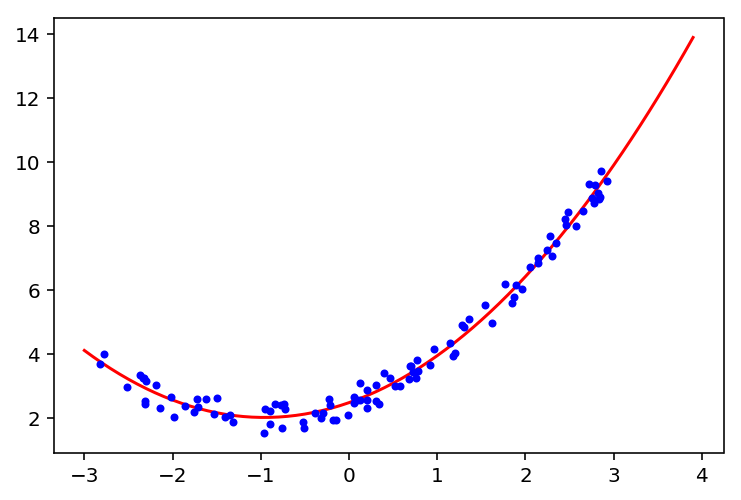

In [76]:
X_new1 = np.arange(-3,4,0.1)[:, np.newaxis]
X_ploy_new1 = ploy_features.transform(X_new1)
predict3 = lin_reg.predict(X_ploy_new1)
plt.plot(X_new1,predict3,"r-")
plt.plot(X,y,"b.")

#### 学习曲线

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learing_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()

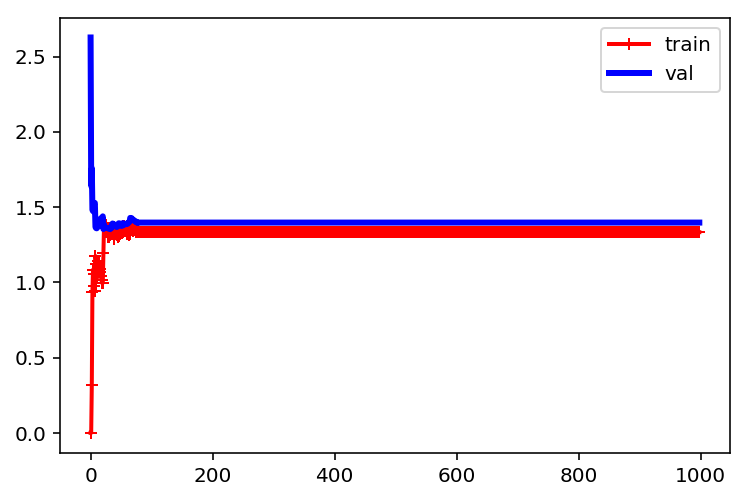

In [94]:
lin_reg = LinearRegression()
plot_learing_curves(lin_reg,X,y)

###### 注意点:根据上图可以看到是个欠拟合模型，如果模型是欠拟合的则增加训练样本并不会有效果，需要更复杂的模型来进行拟合

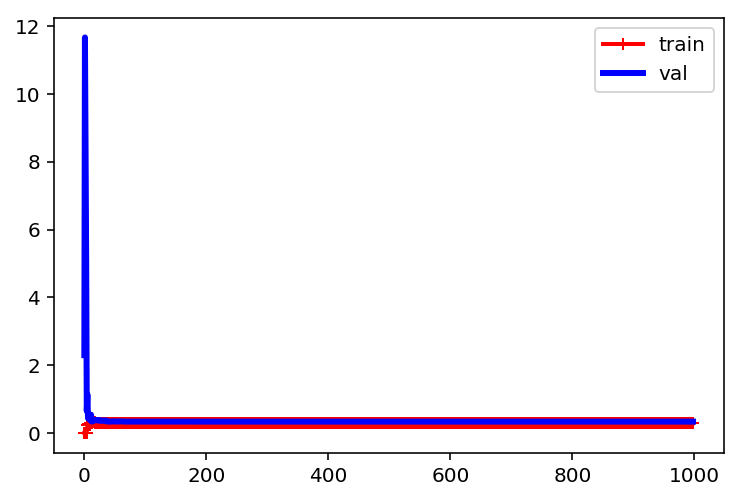

In [97]:
from sklearn.pipeline import Pipeline
polynimial_regression = Pipeline((
    ("poly_features",PolynomialFeatures(degree=4, include_bias=False)),
    ("sgd_reg", LinearRegression())
))
plot_learing_curves(polynimial_regression, X, y)

#### 正则线性模型

###### Ridge Regression(岭回归):正则项为  $ α\sum_{i=1}^{n}w_i^2 $

In [98]:
# α为超参用来控制正则化的力度，如果为0就是线性模型，如果为很大值就表示所有权重都为0
# 就为一条直线

###### $ J(θ) = MSE(θ) + α\frac{1}{2}\sum_{i=1}^{n}θ_i^2 $ 注意$ θ_{0}$ 没有被正则化

###### Ridge Regression 对范围非常敏感，所以一定要标准化

In [102]:
#采用封闭方式（矩阵分解）解决Ridge Regression

###### $ (X^{T}X+αA)^{-1}X^{T}y$

In [111]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.60274644]])

In [114]:
# 采用梯度下降方式
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

array([ 4.80968665])

###### Lasso Regression(套索回归):正则项为  $ α\sum_{i=1}^{n}|w_i| $
###### $ J(θ) = MSE(θ) + α\sum_{i=1}^{n}|θ_i| $ 注意$ θ_{0}$ 没有被正则化

In [116]:
# 采用梯度下降方式
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # ==SGDRegressor(penalty="l1")
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.56327927])

###### Elastic Net
###### $ J(θ) = MSE(θ) + rα\sum_{i=1}^{n}|θ_i| + \frac{1-r}{2}α\sum_{i=1}^{n}θ_i^2 $ 注意$ θ_{0}$ 没有被正则化

In [117]:
# 采用梯度下降方式
from sklearn.linear_model import ElasticNet
lasso_reg = ElasticNet(alpha=0.1, l1_ratio=0.5) # ==SGDRegressor(penalty="l1")
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.56002144])

###### 早停

In [128]:
from sklearn.preprocessing import StandardScaler
poly_fea = PolynomialFeatures(degree=2, include_bias=None)
poly_fea.fit(X_train)
X_train_ploy = poly_fea.transform(X_train)
X_val_ploy = poly_fea.transform(X_val)
std = StandardScaler()
std.fit(X_train_ploy)
X_train_poly_scaled = std.transform(X_train_ploy)
X_val_poly_scaled = std.transform(X_val_ploy)

from sklearn.base import clone
# 这里是表示可以迭代训练，保留上次训练参数
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, 
                       learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [136]:
sgd_reg.predict(std.transform(poly_fea.transform([[1.5]])))

array([ 5.05838054])

#### 逻辑回归（Logistic Regression)

###### $ p=h_{θ}(x)=σ(θ^{T}x)$ 这里σ(.)表示 sigmoid 函数
###### 损失函数采用逻辑损失 ，y=1时损失函数为-log(p)【表示：当样本为正例时 p的概率越大表示损失函数越大】，y=0时损失函数为-log(1-p)【与上注释同理反之】
###### $ J(θ) = -\frac{1}{m}\sum_{i=1}^{m}[y^{i}\log{p^{i}} + (1-y^{(i)})\log{(1-p^{i})} ]$
###### 注意:没有对应的正规方程解法

In [137]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [142]:
X = iris.data[:,3:] # petal width

In [146]:
y = (iris.target == 2).astype(np.int)

In [148]:
# 训练逻辑回归模型,默认是 l2正则惩罚这里使用的参数时 c(c 越大模型正则化越小)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

###### 决策边界

In [149]:
X_new = np.linspace(0,3,1000).reshape(-1,1)

In [154]:
y_proba = log_reg.predict_proba(X_new)

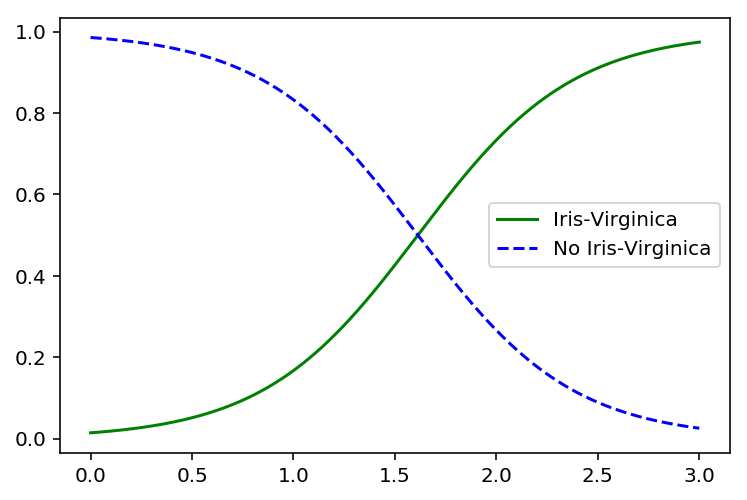

In [158]:
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="No Iris-Virginica")
plt.legend()

In [159]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

###### softmax 回归
###### 得分公式 $ S_{k}(X) = θ_{k}^{T} * X$ ，$θ_{k}$表示的是自己的所在的类的参数，可以通过一个矩阵表示
###### 概率转换 $ p_{k} = σ(S(X))_{k} = \frac{exp(S_{k}(X))}{\sum_{j=1}^{K}exp(S_{j}(X))}$，计算所有的分类概率，然后讲他们归一化各个类别，K 是总分类数；s(X)是得分；$σ(S(X))_{k}$是所属 k 类别的概率
###### 同理于逻辑归回，softmax 回归也是使用最大似然估计估计预测 $ y = argmax_{k}σ(S(X))_{k}  $
###### 模型使用交叉熵的方式来评估模型判断的类别和目标类别是否匹配，公式为: $ J(θ) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{j=1}^{K}y^{i}_{k}log(p_{k}^{i}) $，$y^{i}_{k}$等于1当$y^{i}$属于类别 k 时，其他都为0，注意当 K=2时就变成逻辑回归了，交叉熵的梯度$▽_{θ_{k}}J(θ)=\frac{1}{m}\sum_{i=1}^{m}(p^{i}-y^{i})x^{i}$

In [160]:
X = iris.data[:,(2,3)]
y = iris.target
# 逻辑回归模型使用1对其他的方式，multi_class="multinomial"设置多分类，solver="lbfgs"用来支持 softmax 回归，l2默认是用
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs")
softmax_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
softmax_reg.predict([[5,2]])

array([2])

In [163]:
softmax_reg.predict_proba([[5,2]])

array([[  2.43559894e-04,   2.14859516e-01,   7.84896924e-01]])